In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import missingno
import seaborn

In [3]:
# plt.style.available
plt.style.use('ggplot')

In [4]:
pd.options.display.max_columns = None  # to stop pandas from not displaying all columns because of screen width

In [5]:
pd.options.display.max_rows = None  # to stop pandas from not displaying all columns because of screen width

In [6]:
pd.options.display.max_colwidth = 100  # To prevent pandas from concatenating very long columns. Set to 0.

Download link (Direct download):
- https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/rows.csv?accessType=DOWNLOAD

# Loading the Sentencing Dataset.

In [7]:
sentencing_orig = pd.read_csv("Sentencing.csv",
                              parse_dates=["DISPOSITION_DATE", "SENTENCE_DATE", "INCIDENT_BEGIN_DATE", "INCIDENT_END_DATE", "ARREST_DATE", "ARRAIGNMENT_DATE", "RECEIVED_DATE"])
#warning is that if dtypes are not defined for all columns, the entire dataset is loaded to memory before the dtypes are determined 

C:\Users\minur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### List of columns

In [8]:
sentencing_orig.columns

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'OFFENSE_CATEGORY', 'PRIMARY_CHARGE',
       'CHARGE_ID', 'CHARGE_VERSION_ID', 'DISPOSITION_CHARGED_OFFENSE_TITLE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'DISPOSITION_DATE', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_JUDGE', 'SENTENCE_TYPE', 'CURRENT_SENTENCE',
       'COMMITMENT_TYPE', 'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'COURT_NAME',
       'COURT_FACILITY', 'LENGTH_OF_CASE_in_Days', 'AGE_AT_INCIDENT', 'GENDER',
       'RACE', 'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'ARREST_DATE',
       'LAW_ENFORCEMENT_AGENCY', 'UNIT', 'INCIDENT_CITY', 'RECEIVED_DATE',
       'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY', 'CHARGE_COUNT'],
      dtype='object')

In [9]:
sentencing_orig.head()

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
0,44670309710,218297158761,PROMIS Conversion,False,297139645442,83571817251,FIRST DEGREE MURDER,38,-,9-1(a)(2),X,0000001607,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,2
1,44670309710,218297158761,PROMIS Conversion,False,297176911341,94830742153,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,4
2,44670309710,218297158761,PROMIS Conversion,False,297177207102,94826043158,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,5
3,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Clayton Jay Crane,Prison,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,10982.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,13
4,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,False,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,13


In [45]:
# A single crime can have multiple charges
sentencing_orig.query("CASE_PARTICIPANT_ID == 218297158761")

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
0,44670309710,218297158761,PROMIS Conversion,False,297139645442,83571817251,FIRST DEGREE MURDER,38,-,9-1(a)(2),X,0000001607,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,2
1,44670309710,218297158761,PROMIS Conversion,False,297176911341,94830742153,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,4
2,44670309710,218297158761,PROMIS Conversion,False,297177207102,94826043158,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,5
3,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Clayton Jay Crane,Prison,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,10982.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,13
4,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,False,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,13
5,44670309710,218297158761,PROMIS Conversion,False,297140236964,70609573999,HOME INVASION,38-12-11-A(2),NaN,NaN,X,0000001847,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,14
6,44670309710,218297158761,PROMIS Conversion,False,297178390146,80671262249,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,0000002150,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Clayton Jay Crane,Prison,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,10982.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,15
7,44670309710,218297158761,PROMIS Conversion,False,297178390146,80671262249,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,0000002150,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,False,Illinois Department of Correction

In [28]:
#number of unique case_participants
print(sentencing_orig["CASE_PARTICIPANT_ID"].nunique())
print(len(sentencing_orig))
# 85% of all accused individuals include only a single charge

201181
236124


In [78]:
# case_participant_id seems to be unique each time someone is arrested since we cant find repeat offenders who have the same CASE_PARTICIPANT_ID and a different CASE_ID
sentencing_orig.groupby("CASE_PARTICIPANT_ID")["CASE_ID"].nunique().sort_values(ascending=False)

CASE_PARTICIPANT_ID
1099816034107    1
930450741108     1
930450154818     1
930449568528     1
930446519821     1
                ..
1000500648984    1
1000500297210    1
1000500062694    1
1000498186567    1
120603216768     1
Name: CASE_ID, Length: 201181, dtype: int64

### Looking at the distribution of charge counts per individual.
2 ways to get # charges per individual:
1. Group by CASE_PARTICIPANT_ID. Get largest value in CHARGE_COUNT column per group
2. Group by CASE_PARTICIPANT_ID. Count number of rows in each groupby
-----------------------
From the distributions below for < 100 charges, both distributions look very similar but there are some strikingly large outliers in charge count from method 1 (above).
2 reasons for this:
- There is incorrectly entered data from method 1
- Not all of the charges are in the dataset, so method 2 will be an below the actual
-----------------------
From looking at the charges from a single individual, it is clear that the charge count is not from one erroneous charge number (e.g. if the charges are labelled [1,2,3,4,5,99], then 99 is likely incorrect).
All of the charge numbers are large and seemingly fairly evenly distributed in the range (e.g. for max charge number 297, the charge numbers look like this for the one with the  largest charge count [58, 59, 68, 69, 70, 71, 247, 293, 294, 297].

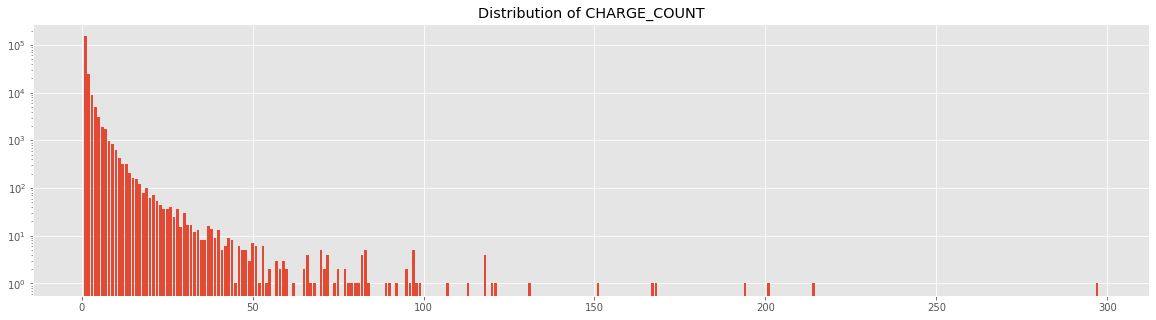

In [114]:
# determine the charge counts by participant by taking the largest value in CHARGE_COUNT after groupby CASE_PARTICIPANT_ID
max_charge_counts = sentencing_orig.groupby("CASE_PARTICIPANT_ID")["CHARGE_COUNT"].max().value_counts()

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(max_charge_counts.index, max_charge_counts)
ax.set_yscale('log')
ax.set_title("Distribution of CHARGE_COUNT");
# ax.set_xlim(0,100)

In [ ]:
max_charge_counts.sort_index().index

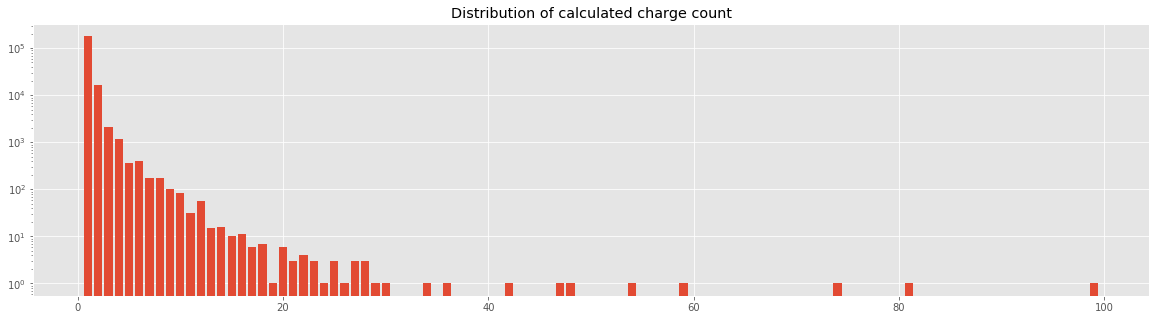

In [115]:
c_charge_counts = sentencing_orig.groupby("CASE_PARTICIPANT_ID").size().value_counts()

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(c_charge_counts.index, c_charge_counts)
ax.set_yscale('log')
ax.set_title("Distribution of calculated charge count");

In [46]:
sentencing_orig["DISPOSITION_CHARGED_OFFENSE_TITLE"].value_counts().head(50)

POSSESSION OF A CONTROLLED SUBSTANCE                                                                               36413
AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL                                                                  14966
RETAIL THEFT                                                                                                       13388
FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT, OR PRIVILEGE TO OPERATE A MOTOR VEHICLE IS SUSPENDED OR REVOKED     10503
AGGRAVATED UNLAWFUL USE OF WEAPON                                                                                   9689
AGGRAVATED BATTERY                                                                                                  9321
THEFT                                                                                                               9209
[POSSESSION OF CONTROLLED SUBSTANCE WITH INTENT TO DELIVER/ DELIVERY OF A CONTROLLED SUBSTANCE]                     8843
BURGLARY                        

##### Datetimes are a bit fishy (some dates too early, some in the future)

In [6]:
only_date_features = sentencing_orig[["DISPOSITION_DATE", "SENTENCE_DATE", "INCIDENT_BEGIN_DATE", "INCIDENT_END_DATE", "ARREST_DATE", "ARRAIGNMENT_DATE", "RECEIVED_DATE"]]
only_date_features.sort_values("DISPOSITION_DATE")

,DISPOSITION_DATE,SENTENCE_DATE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,ARRAIGNMENT_DATE,RECEIVED_DATE
52610,1/1/2012 12:00:00 AM,1/1/2012 12:00:00 AM,NaT,NaT,2011-11-30 12:00:00,NaN,2011-11-30
231769,1/1/2019 12:00:00 AM,8/20/2019 12:00:00 AM,2019-01-01,NaT,2019-01-01 01:13:00,2/20/2019 12:00:00 AM,2019-01-01
13403,1/10/2011 12:00:00 AM,1/10/2011 12:00:00 AM,2010-07-01,NaT,2010-07-01 01:05:00,7/29/2010 12:00:00 AM,2010-07-01
21868,1/10/2011 12:00:00 AM,1/10/2011 12:00:00 AM,2010-11-20,NaT,2010-11-20 20:54:00,1/10/2011 12:00:00 AM,2010-11-22
18867,1/10/2011 12:00:00 AM,1/10/2011 12:00:00 AM,2010-10-10,NaT,2010-10-10 15:05:00,11/16/2010 12:00:00 AM,2010-10-10
...,...,...,...,...,...,...,...
226160,9/9/2019 12:00:00 AM,9/9/2019 12:00:00 AM,2018-06-07,NaT,2018-07-27 09:37:00,10/12/2018 12:00:00 AM,2018-07-28
189516,9/9/2019 12:00:00 AM,9/9/2019 12:00:00 AM,2016-08-30,NaT,2016-08-30 21:15:00,10/11/2016 12:00:00 AM,2016-08-31
218624,9/9/2019 12:00:00 AM,9/9/2019 12:00:00 AM,2018-01-10,NaT,2018-09-03 22:22:00,11/7/2018 12:00:00 AM,2018-02-21
235246,9/9/2019 12:00:00 AM,9/9/2019 12:00:00 AM,2019-06-06,NaT,2019-06-09 18:11:00,9/9/2019 12:00:00 AM,2019-06-10


In [7]:
only_date_features.describe()

,DISPOSITION_DATE,SENTENCE_DATE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,ARRAIGNMENT_DATE,RECEIVED_DATE
count,236124,236124,233826,21860,231244,217350,236124
unique,2504,2907,5625,3944,171676,3052,5214
top,10/30/2013 12:00:00 AM,12/14/2011 12:00:00 AM,2011-04-14 00:00:00,2004-07-07 00:00:00,2004-07-20 22:00:00,9/3/2013 12:00:00 AM,2012-08-28 00:00:00
freq,237,238,183,124,99,269,203
first,NaN,NaN,1883-02-02 00:00:00,1912-01-23 00:00:00,1915-04-04 17:45:00,NaN,1901-07-24 00:00:00
last,NaN,NaN,2019-11-03 00:00:00,2019-11-03 00:00:00,2019-11-03 03:32:00,NaN,2019-11-03 00:00:00


In [305]:
# Pandas datetime object have a max year of 2262 so use numpy datetime
def gettime(datetime_str):
    return datetime.strptime(datetime_str.split(" ")[0],'%m/%d/%Y')

v_getdate = np.vectorize(gettime)

In [335]:
disposition_date_parsed = v_getdate(sentencing_orig["DISPOSITION_DATE"])
sentence_date_parsed =  v_getdate(sentencing_orig["DISPOSITION_DATE"])
arraingment_date_parsed = v_getdate(sentencing_orig["DISPOSITION_DATE"])
incident_begin_date_parsed = np.array(sentencing_orig["INCIDENT_BEGIN_DATE"])
incident_end_date_parsed = sentencing_orig["INCIDENT_END_DATE"]
received_date_parsed = sentencing_orig["RECEIVED_DATE"]

In [351]:
disposition_date_parsed[disposition_date_parsed > (datetime.strptime("01/01/2261",'%m/%d/%Y'))]

array([datetime.datetime(2912, 1, 27, 0, 0),
       datetime.datetime(2911, 11, 19, 0, 0),
       datetime.datetime(2916, 5, 19, 0, 0),
       datetime.datetime(2916, 5, 19, 0, 0),
       datetime.datetime(2917, 12, 18, 0, 0)], dtype=object)

In [339]:
dateincident_begin_date_parsed

0        1984-08-09
1        1984-08-09
2        1984-08-09
3        1984-08-09
4        1984-08-09
            ...    
236119   2019-10-21
236120   2019-10-18
236121   2019-10-20
236122   2019-11-03
236123   2019-07-27
Name: INCIDENT_BEGIN_DATE, Length: 236124, dtype: datetime64[ns]

In [325]:
v_getdate(sentencing_orig["DISPOSITION_DATE"])

array([datetime.datetime(2014, 12, 17, 0, 0),
       datetime.datetime(2014, 12, 17, 0, 0),
       datetime.datetime(2014, 12, 17, 0, 0), ...,
       datetime.datetime(2019, 11, 26, 0, 0),
       datetime.datetime(2019, 11, 26, 0, 0),
       datetime.datetime(2019, 11, 5, 0, 0)], dtype=object)

In [330]:
date_features_parsed = pd.DataFrame.from_dict({"DISPOSITION_DATE": v_getdate(sentencing_orig["DISPOSITION_DATE"]),
                       "SENTENCE_DATE": v_getdate(sentencing_orig["DISPOSITION_DATE"]),
                       "ARRAIGNMENT_DATE": v_getdate(sentencing_orig["DISPOSITION_DATE"])})

In [342]:
def plot_histogram_by_year(pandas_series):
    pandas_series = pd.Series(pandas_series)
    grouped_by_year = pd.DataFrame(pandas_series).dropna().groupby([pandas_series.dt.year]).count() #returns a dataframe
    plt.figure(figsize=(20,5))
    plt.yscale("log")
    plt.bar(list(grouped_by_year.index),list(grouped_by_year.iloc[:,0]))
    plt.xlabel("year", fontsize=15);
    plt.ylabel("Number of arrests", fontsize=15);

In [345]:
plt.hist(disposition_date_parsed)

TypeError: bar() missing 1 required positional argument: 'height'

In [331]:
pd.to_datetime(date_features_parsed["DISPOSITION_DATE"])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2912-01-27 00:00:00

In [238]:
sentencing_orig.dtypes

CASE_ID                                       int64
CASE_PARTICIPANT_ID                           int64
OFFENSE_CATEGORY                             object
PRIMARY_CHARGE                                 bool
CHARGE_ID                                     int64
CHARGE_VERSION_ID                             int64
DISPOSITION_CHARGED_OFFENSE_TITLE            object
DISPOSITION_CHARGED_CHAPTER                  object
DISPOSITION_CHARGED_ACT                      object
DISPOSITION_CHARGED_SECTION                  object
DISPOSITION_CHARGED_CLASS                    object
DISPOSITION_CHARGED_AOIC                     object
DISPOSITION_DATE                             object
CHARGE_DISPOSITION                           object
CHARGE_DISPOSITION_REASON                    object
SENTENCE_PHASE                               object
SENTENCE_DATE                                object
SENTENCE_JUDGE                               object
SENTENCE_TYPE                                object
CURRENT_SENT

In [127]:
print(sentencing_orig.columns)
print(len(sentencing_orig.columns))

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'OFFENSE_CATEGORY', 'PRIMARY_CHARGE',
       'CHARGE_ID', 'CHARGE_VERSION_ID', 'DISPOSITION_CHARGED_OFFENSE_TITLE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'DISPOSITION_DATE', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_JUDGE', 'SENTENCE_TYPE', 'CURRENT_SENTENCE',
       'COMMITMENT_TYPE', 'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'COURT_NAME',
       'COURT_FACILITY', 'LENGTH_OF_CASE_in_Days', 'AGE_AT_INCIDENT', 'GENDER',
       'RACE', 'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'ARREST_DATE',
       'LAW_ENFORCEMENT_AGENCY', 'UNIT', 'INCIDENT_CITY', 'RECEIVED_DATE',
       'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY', 'CHARGE_COUNT'],
      dtype='object')
39


In [13]:
sentencing_orig.head(5)

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
0,44670309710,218297158761,PROMIS Conversion,False,297139645442,83571817251,FIRST DEGREE MURDER,38,-,9-1(a)(2),X,0000001607,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,8/9/1984 12:00:00 AM,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,Homicide,2
1,44670309710,218297158761,PROMIS Conversion,False,297176911341,94830742153,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,8/9/1984 12:00:00 AM,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,Homicide,4
2,44670309710,218297158761,PROMIS Conversion,False,297177207102,94826043158,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,8/9/1984 12:00:00 AM,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,Homicide,5
3,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Clayton Jay Crane,Prison,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,10982.0,27.0,Male,Black,8/9/1984 12:00:00 AM,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,Homicide,13
4,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,False,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,8/9/1984 12:00:00 AM,NaN,8/15/1984 12:00:00 AM,CHICAGO POLICE DEPT,NaN,NaN,8/15/1984 12:00:00 AM,9/21/1984 12:00:00 AM,Homicide,13


#### __Categorize features by numeric / ordinal / categorical__

In [24]:
# categorize features for preprocessing

# features that don't affect the model
drop_features = ["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID", "CHARGE_VERSION_ID"]

numeric_features = ["LENGTH_OF_CASE_in_Days","AGE_AT_INCIDENT"]

# features to be one-hot encoded
categorical_features = ["OFFENSE_CATEGORY", "DISPOSITION_CHARGED_OFFENSE_TITLE", "CHARGE_DISPOSITION",
                        "SENTENCE_PHASE", "SENTENCE_JUDGE", "SENTENCE_TYPE", "COMMITMENT_TYPE",
                       "COMMITMENT_TYPE", "GENDER", "RACE", "LAW_ENFORCEMENT_AGENCY",
                       "UPDATED_OFFENSE_CATEGORY", "CHARGE_COUNT"] #use one-hot encoding with drop first

# these will also be one-hot encoded
boolean_features = ["CURRENT_SENTENCE", "PRIMARY_CHARGE"]


# ordinal encoding
ordinal_features = []

# to be dropped for now
features_for_later = ["COURT_NAME", "COURT_FACILITY", "INCIDENT_CITY"]

complex_or_unknown_features = ["DISPOSITION_CHARGED_CHAPTER", "DISPOSITION_CHARGED_ACT", "DISPOSITION_CHARGED_SECTION",
                              "DISPOSITION_CHARGED_CLASS", "DISPOSITION_CHARGED_AOIC", "UNIT"]

# to be dropped because not enough examples have feature
too_many_missing_features = ["CHARGE_DISPOSITION_REASON"]

# time features (also will be dropped for now)
time_features = [b"DISPOSITION_DATE", "SENTENCE_DATE", "INCIDENT_BEGIN_DATE", "INCIDENT_END_DATE", "ARREST_DATE",
                "RECEIVED_DATE", "ARRAIGNMENT_DATE"]

# what we are predicting (y)
target = ["COMMITMENT_TERM", "COMMITMENT_UNIT"]

In [28]:
sentencing_orig[ ["CASE_ID"] + categorical_features + numeric_features].head(10)

,CASE_ID,OFFENSE_CATEGORY,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_DISPOSITION,SENTENCE_PHASE,SENTENCE_JUDGE,SENTENCE_TYPE,COMMITMENT_TYPE,COMMITMENT_TYPE,GENDER,RACE,LAW_ENFORCEMENT_AGENCY,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT
0,44670309710,PROMIS Conversion,FIRST DEGREE MURDER,Nolle On Remand,Original Sentencing,John Mannion,Conversion,Natural Life,Natural Life,Male,Black,CHICAGO POLICE DEPT,Homicide,2,619.0,27.0
1,44670309710,PROMIS Conversion,FIRST DEGREE MURDER,Nolle On Remand,Original Sentencing,John Mannion,Conversion,Natural Life,Natural Life,Male,Black,CHICAGO POLICE DEPT,Homicide,4,619.0,27.0
2,44670309710,PROMIS Conversion,FIRST DEGREE MURDER,Nolle On Remand,Original Sentencing,John Mannion,Conversion,Natural Life,Natural Life,Male,Black,CHICAGO POLICE DEPT,Homicide,5,619.0,27.0
3,44670309710,PROMIS Conversion,HOME INVASION,Plea Of Guilty,Amended/Corrected Sentencing,Clayton Jay Crane,Prison,Illinois Department of Corrections,Illinois Department of Corrections,Male,Black,CHICAGO POLICE DEPT,Homicide,13,10982.0,27.0
4,44670309710,PROMIS Conversion,HOME INVASION,Plea Of Guilty,Original Sentencing,John Mannion,Conversion,Illinois Department of Corrections,Illinois Department of Corrections,Male,Black,CHICAGO POLICE DEPT,Homicide,13,619.0,27.0
5,44670309710,PROMIS Conversion,HOME INVASION,Nolle On Remand,Original Sentencing,John Mannion,Conversion,Illinois Department of Corrections,Illinois Department of Corrections,Male,Black,CHICAGO POLICE DEPT,Homicide,14,619.0,27.0
6,44670309710,PROMIS Conversion,ARMED ROBBERY,Plea Of Guilty,Amended/Corrected Sentencing,Clayton Jay Crane,Prison,Illinois Department of Corrections,Illinois Department of Corrections,Male,Black,CHICAGO POLICE DEPT,Homicide,15,10982.0,27.0
7,44670309710,PROMIS Conversion,ARMED ROBBERY,Plea Of Guilty,Original Sentencing,John Mannion,Conversion,Illinois Department of Corrections,Illinois Department of Corrections,Male,Black,CHICAGO POLICE DEPT,Homicide,15,619.0,27.0
8,44670309710,PROMIS Conversion,ARMED ROBBERY,Nolle On Remand,Original Sentencing,John Mannion,Conversion,Illinois Department of Corrections,Illinois Department of Corrections,Male,Black,CHICAGO POLICE DEPT,Homicide,16,619.0,27.0
9,44670309710,PROMIS Conversion,FIRST DEGREE MURDER,Plea Of Guilty,Amended/Corrected Sentencing,Clayton Jay Crane,Prison,Illinois Department of Corrections,Illinois Department of Corrections,Male,Black,CHICAGO POLICE DEPT,Homicide,1,10982.0,27.0


In [12]:
# check that I haven't missed any features
len(set(drop_features + numeric_features + categorical_features + boolean_features + ordinal_features + complex_or_unknown_features + features_for_later + target + time_features + too_many_missing_features))

39

## Questions about which features to use:
- Can LENGTH_OF_CASE_in_Days be used as a feature? The case length will only be known once the verdict is given and therefore I don't think it is a reasonable feature to be included in predicting the target.
- Can we use RACE as a feature (or any other feature that in theory should not affect a sentence)? 
    - There are ethical issues - just the fact that a prediction is affected by race is wrong.
    - And statistical issues - in one sense, the sentence should have nothing to do with race, so this feature should either be a junk feature when it comes to prediction. It could also lead to issues with collinearity (in this dataset, black people might , which we also do not want).
    - On the other hand, you can argue that judges are almost certainly biased and if our goal is to predict the sentence a judge would make we should keep the feature, but if we wanted to give a sentence based on the model, this feature should not be used.


- Is this dataset complete for the time range? If it is not, is it sampled such that it is approximately IID? (the predictions will match the model and not the real world if it is not representative of the real world) 

# Exploring the Dataset.
#### Looking for missing values, obvious errors, patterns

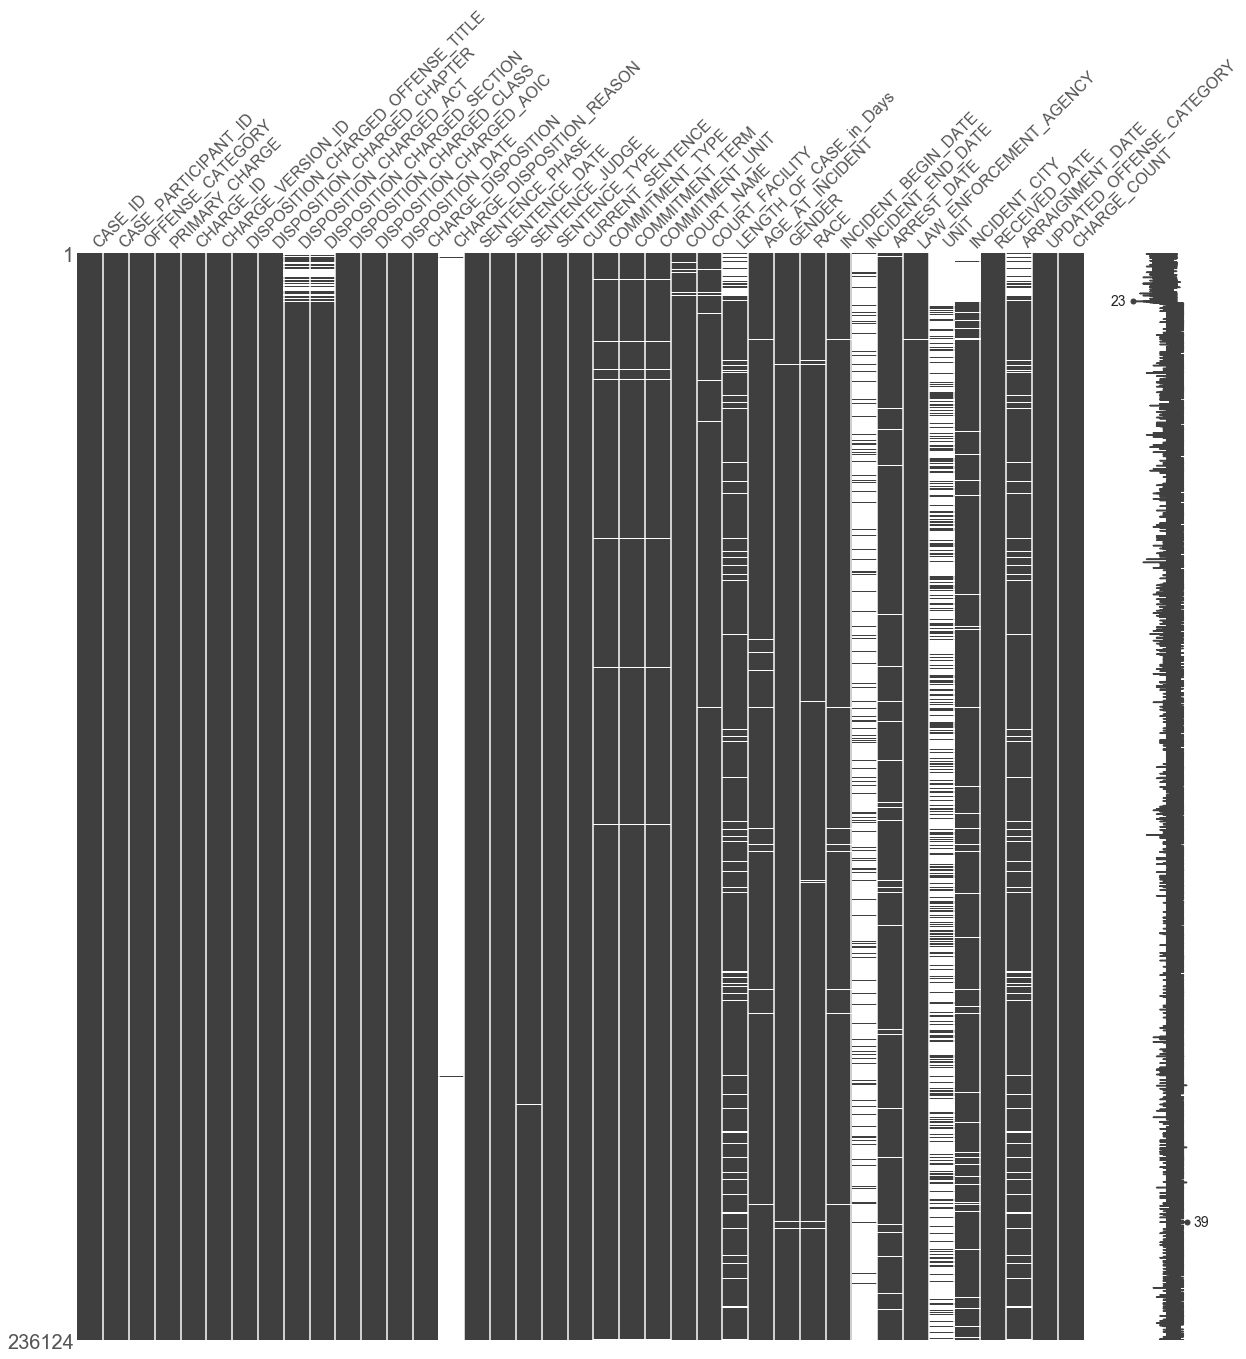

In [199]:
# missingno. Unhide one below for more detailed view.
missingno.matrix(sentencing_orig, figsize=(20,20))

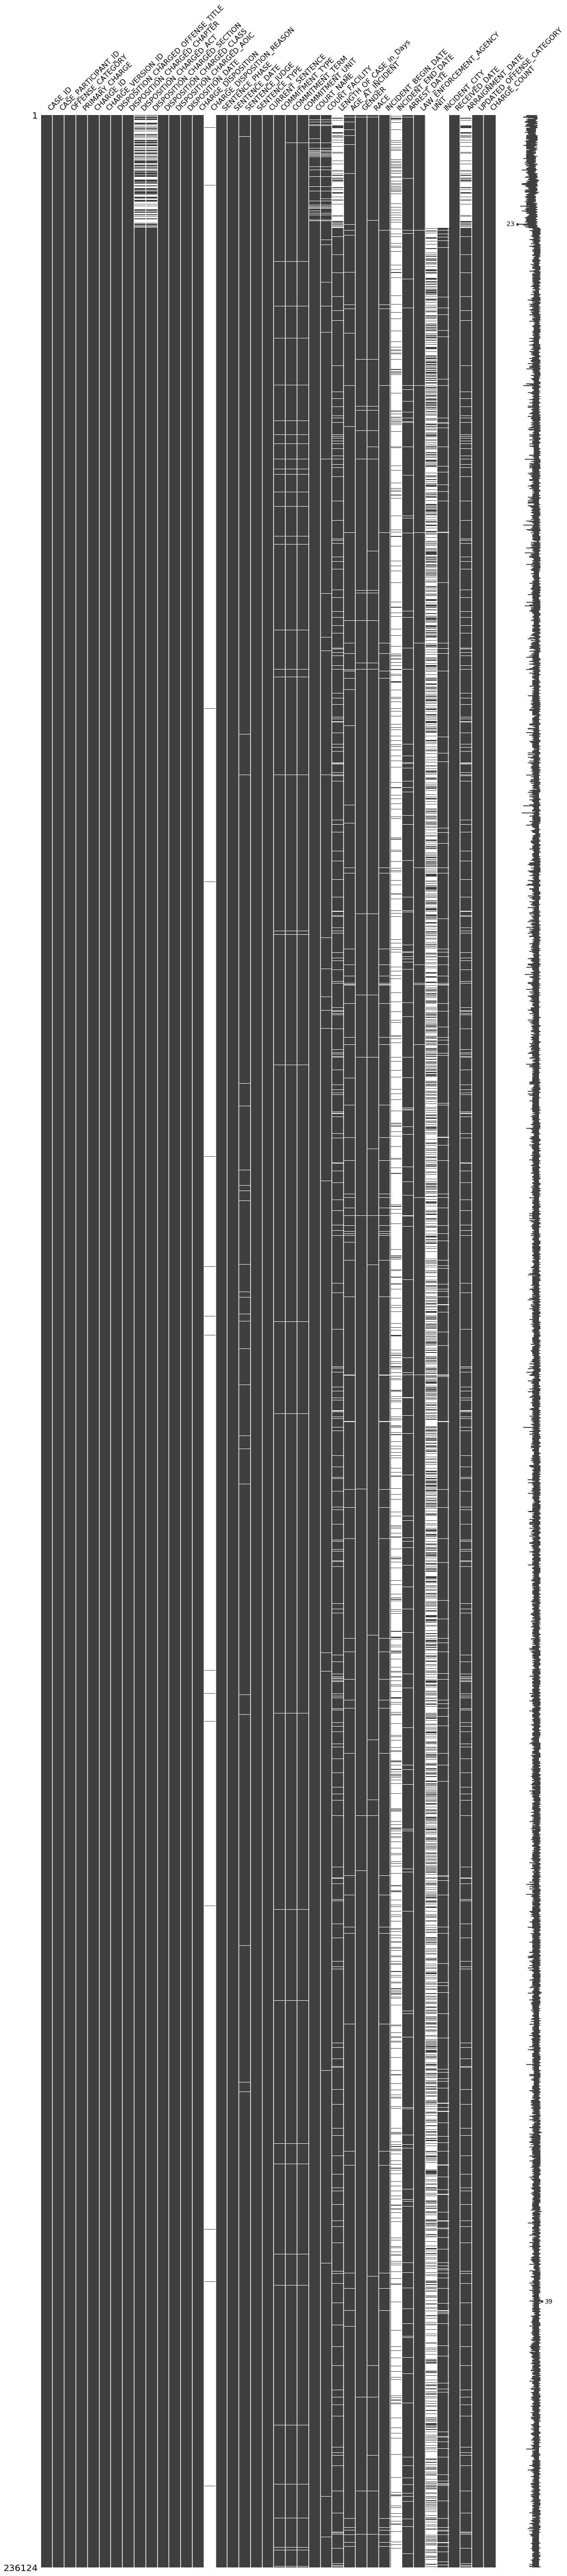

In [139]:
# same as above but larger figsize
missingno.matrix(sentencing_orig, figsize=(20,100))

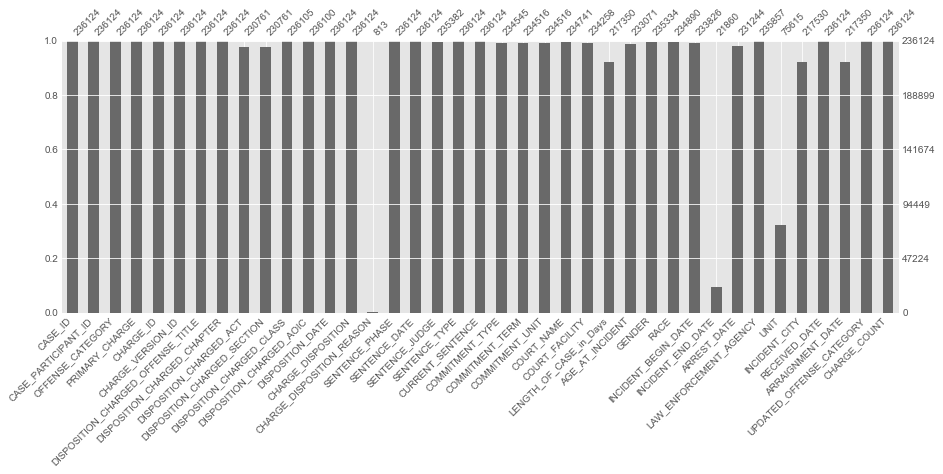

In [205]:
missingno.bar(sentencing_orig, figsize=(15,5), fontsize=10)

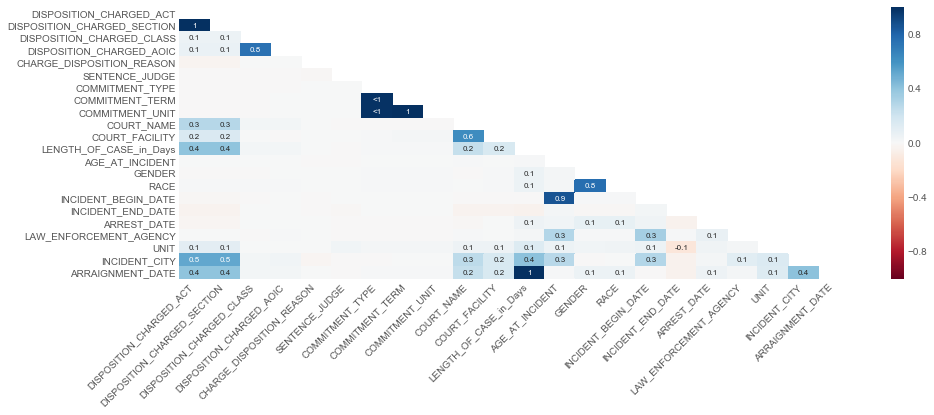

In [207]:
# corellation between missing values (-1 = if A is present, B is missing, 0 = no corellation, 1 = if A present, B also present)
missingno.heatmap(sentencing_orig, figsize=(15,5), fontsize=10)

In [29]:
pd.DataFrame(sentencing_orig["ARREST_DATE"]).dropna().loc[0]

ARREST_DATE    8/15/1984 12:00:00 AM
Name: 0, dtype: object

In [23]:
type(pd.Series(range(3), index=pd.date_range('2000', freq='D', periods=3)).index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [73]:
len(pd.to_datetime(sentencing_orig["ARREST_DATE"]).dropna())

231244

In [78]:
df = pd.DataFrame(sentencing_orig["ARREST_DATE"]).dropna()

In [82]:
ds = sentencing_orig["ARREST_DATE"]

In [87]:
ds.name

'ARREST_DATE'

In [74]:
grouped_by_year = df.groupby([ds.dt.year]).count()

NameError: name 'df' is not defined

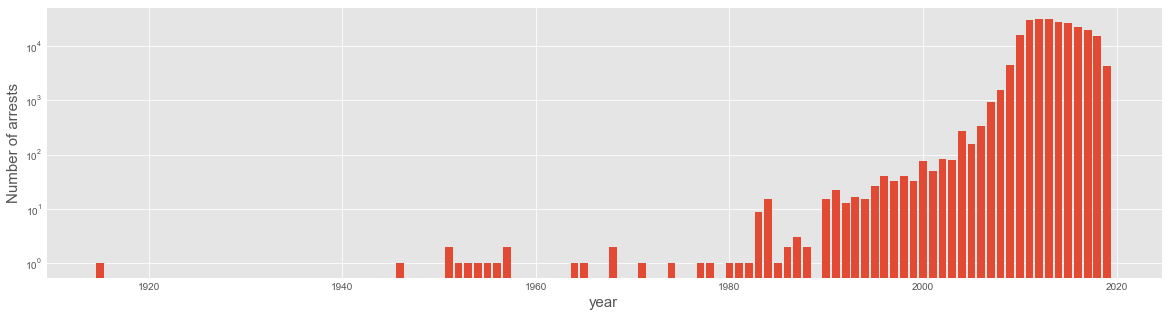

In [197]:
plot_histogram_by_year(sentencing_orig["ARREST_DATE"])

In [13]:
sentencing_orig.sort_values("ARREST_DATE")

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
154778,123071517108,994154413440,Narcotics,True,2299021444305,523063798405,POSSESSION OF A CONTROLLED SUBSTANCE,720,570,402(c),4,5101110,8/10/2015 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,8/10/2015 12:00:00 AM,Joseph Cataldo,Probation,True,Probation,24,Months,District 3 - Rolling Meadows,Rolling Meadows Courthouse,NaN,23.0,Male,White,2015-04-04,NaT,1915-04-04 17:45:00,MOUNT PROSPECT PD,NaN,Mount Prospect,2015-04-14,NaN,Narcotics,1
187871,125473846083,1025880431810,Sex Crimes,True,2384475108256,542834347553,CRIMINAL SEXUAL ABUSE,720,5,11-1.50(a)(2),4,0015814,2/26/2019 12:00:00 AM,Finding Guilty,NaN,Original Sentencing,6/12/2019 12:00:00 AM,Michael B McHale,Probation,True,Sex Offender Probation,24,Months,District 1 - Chicago,26TH Street,1000.0,38.0,Male,Unknown,2015-10-30,NaT,1946-08-04 16:11:00,CHICAGO PD,NaN,Chicago,2016-08-05,9/15/2016 12:00:00 AM,Sex Crimes,1
220494,128220240956,1062694859541,Retail Theft,True,2487095338144,566747395930,RETAIL THEFT,720,5,16-25(a)(1),4,0016720,6/8/2018 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/8/2018 12:00:00 AM,Neera Walsh,Probation,False,Drug Court Probation,71,Days,District 1 - Chicago,26TH Street,49.0,67.0,Male,Black,2018-03-30,NaT,1951-05-07 10:05:00,CHICAGO PD,NaN,Chicago,2018-03-30,4/20/2018 12:00:00 AM,Retail Theft,1
220495,128220240956,1062694859541,Retail Theft,True,2487095338144,566747395930,RETAIL THEFT,720,5,16-25(a)(1),4,0016720,6/8/2018 12:00:00 AM,Plea Of Guilty,NaN,Probation Violation Sentencing,9/7/2018 12:00:00 AM,Neera Walsh,Prison,True,Illinois Department of Corrections,2,Year(s),District 1 - Chicago,26TH Street,140.0,67.0,Male,Black,2018-03-30,NaT,1951-05-07 10:05:00,CHICAGO PD,NaN,Chicago,2018-03-30,4/20/2018 12:00:00 AM,Retail Theft,1
72331,117375047360,921556724516,Narcotics,False,2115716106730,480824067611,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720,570,401(d)(i),2,5097200,6/13/2013 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/7/2013 12:00:00 AM,Thomas V Gainer,Prison,True,Illinois Department of Corrections,4,Year(s),District 1 - Chicago,26TH Street,282.0,60.0,Male,White,2012-02-22,NaT,1952-12-17 01:13:00,CHICAGO PD,District 23 - Town Hall,Chicago,2012-07-16,8/29/2012 12:00:00 AM,Narcotics,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235621,130526555616,1092198370456,Burglary,True,2565890828145,585090793342,BURGLARY,720,5,19-1(a),2,1110000,8/20/2019 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,8/20/2019 12:00:00 AM,Angela Munari Petrone,Prison,True,Illinois Department of Corrections,6,Year(s),District 1 - Chicago,26TH Street,25.0,37.0,Male,White [Hispanic or Latino],2017-03-20,NaT,NaT,CHICAGO PD,District 25 - Grand Central,Chicago,2019-07-12,7/26/2019 12:00:00 AM,Burglary,1
235696,130569131307,1092768244163,Robbery,False,2567476699179,585460134304,POSSESSION OF A STOLEN MOTOR VEHICLE,625,5,4-103(a)(1),2,5710001,9/24/2019 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,9/24/2019 12:00:00 AM,Timothy Joseph Joyce,Probation,True,Probation,2,Year(s),District 1 - Chicago,26TH Street,42.0,25.0,Male,Unknown,2019-02-09,NaT,NaT,CHICAGO PD,NaN,Chicago,2019-07-20,8/13/2019 12:00:00 AM,Robbery,2
235910,130705575008,1094553965701,Burglary,True,2571225471

# Converting sentence to months

If all of \[COMMITMENT_TYPE, COMMITMENT_TERM, COMMITMENT_UNIT\] are NaN, and SENTENCE_TYPE is not one of [Death, Natural life, any non prison sentence such as Boot Camp], will attempt conversion to months

In [64]:
sentencing_orig[sentencing_orig['COMMITMENT_TYPE'].isna() & sentencing_orig['COMMITMENT_TERM'].isna() & sentencing_orig['COMMITMENT_UNIT'].isna()].head(100)

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
256,54088035004,222432847162,PROMIS Conversion,True,407136452998,456246044394,ATTEMPT POSSESSION OF A CONTROLLED SUBSTANCE,720,5,8-4(570/402(c)),A,5101110,1/5/2011 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,1/5/2011 12:00:00 AM,William J Kunkle,Jail,True,NaN,NaN,NaN,District 5 - Bridgeview,Bridgeview Courthouse,NaN,39.0,Female,Black,2004-08-07,NaT,2004-08-07 23:15:00,C P D AREA 1 DIST 7,NaN,NaN,2004-08-09,NaN,Narcotics,1
686,58620506389,237542122153,PROMIS Conversion,True,508670056593,102782179135,DRIVING ON SUSPENDED LICENSE,625,5,6-303(a),A,5880000,2/15/2019 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,2/15/2019 12:00:00 AM,Joseph Cataldo,Conditional Discharge,True,NaN,NaN,NaN,District 3 - Rolling Meadows,Rolling Meadows Courthouse,NaN,32.0,Male,White,2005-05-13,NaT,2005-05-13 00:00:00,MT. PROSPECT POLICE DEPARTMENT,NaN,NaN,2005-05-13,NaN,PROMIS Conversion,1
1014,62487535494,254828877540,PROMIS Conversion,False,2279218759658,518486507935,MISAPPR/FI INST PROP/>10K-100K,720,5,16H-15,2,0013227,12/11/2014 12:00:00 AM,Verdict Guilty,NaN,Remanded Sentencing,12/11/2014 12:00:00 AM,Tommy Brewer,Probation,True,NaN,NaN,NaN,District 6 - Markham,Markham Courthouse,2554.0,27.0,Male,White,2007-08-07,2007-08-30,2007-10-04 13:30:00,CALUMET CITY POLICE DEPARTMENT,NaN,NaN,2007-10-04,12/14/2007 12:00:00 AM,Theft,2
1239,62844304015,263113504492,PROMIS Conversion,True,592844849535,246537374425,RECKLESS DISCHARGE OF A FIREARM/ENDANGERS,720,5,24-1.5(A),4,0000010322,1/26/2011 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,1/26/2011 12:00:00 AM,Frank G Zelezinski,Conditional Discharge,True,NaN,NaN,NaN,District 6 - Markham,Markham Courthouse,765.0,20.0,Male,Black,2008-05-20,NaT,2008-11-12 19:27:00,CALUMET CITY POLICE DEPARTMENT,NaN,NaN,2008-11-14,12/22/2008 12:00:00 AM,PROMIS Conversion,1
1790,63879392647,246893562064,PROMIS Conversion,False,546256856360,474127933425,THEFT/BY DECEPTION/<$300/1ST,720,5,16-1(a)(2),A,1015510,2/8/2012 12:00:00 AM,Plea Of Guilty,NaN,Probation Violation Sentencing,1/22/2016 12:00:00 AM,Clayton Jay Crane,Probation Terminated Satisfactorily,True,NaN,NaN,NaN,District 1 - Chicago,PROMIS,NaN,21.0,Male,Black,2007-08-07,NaT,2007-08-07 10:30:00,C P D AREA 4,NaN,NaN,2007-08-07,NaN,PROMIS Conversion,2
1939,64436687415,248320826005,PROMIS Conversion,False,557674122217,201328684695,MANU/DEL CANNABIS / 2000 < 5000 GR,720-550\5(F),NaN,NaN,1,0000011048,2/13/2013 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,2/13/2013 12:00:00 AM,Anna Helen Demacopoulos,Prison,True,NaN,NaN,NaN,District 6 - Markham,PROMIS,NaN,28.0,Male,White,2007-09-17,2007-09-17,2007-09-17 14:22:00,BLUE ISLAND POLICE DEPARTMENT,NaN,NaN,2007-09-19,NaN,PROMIS Conversion,3
2169,65738662554,242151767245,PROMIS Conversion,True,487946076110,163513929823,BURGLARY,720-5\19-1,NaN,NaN,2,0001110000,6/27/2012 12:00:00 AM,Plea Of Guilty,NaN,Probation Violation Sentencing,6/27/2012 12:00:00 AM,Luciano Panici,Probation,True,NaN,NaN,NaN,District 6 - Markham,Markham Courthouse,1947.0,17.0,Male,Black,2006-07-28,NaT,2006-07-28 01:38:00,HAZEL CREST POLICE DEPARTMENT,NaN,NaN,2006-07-29,2/27/2007 12:00:00 AM,Burglary,1
2840,66463018726,271918522290,PROMIS Conversion,True,648807286628,462833296166,AGGRAVATED ROBBERY,720,5,18-5(a),1,0010734,6/23/2011 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/23/201

In [50]:
COMMITMENT_TERM = pd.DataFrame(sentencing_orig['COMMITMENT_TERM'])

In [51]:
COMMITMENT_TERM.groupby('COMMITMENT_TERM').nunique()

,COMMITMENT_TERM
COMMITMENT_TERM,
0.0,1
1.0,1
1.5,1
2.0,1
2.5,1
2.6,1
3.0,1
3.5,1
4.0,1


In [46]:
sentencing_orig.groupby("COMMITMENT_TERM")['CASE_ID'].nunique()

COMMITMENT_TERM
0.0            389
1.0          21793
1.5              8
2.0          41810
2.5            139
2.6              1
3.0          13617
3.5            188
4.0           8184
4.2              1
4.5            149
4.75             1
5.0           3541
5.2              3
5.25             1
5.5             26
5.6              2
6.0           6887
6.4              1
6.5             63
7.0           2162
7.3              1
7.5             36
7.6              2
8.0           1994
8.5             31
8.6              1
8.75             1
9.0            759
9.3              2
9.5             25
9.6              2
10.0          1568
10.5             8
11.0           307
11.5             5
12.0          2179
12.5             7
12.75            1
13.0           367
13.5            12
14.0           905
14.5             2
15.0          1225
16.0           319
16.5             2
17.0           146
17.5             4
18.0         10542
19.0            55
19.5             2
20.0           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287E6EA7438>]],
      dtype=object)

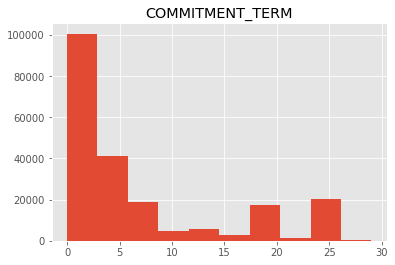

In [115]:
COMMITMENT_TERM = pd.to_numeric(sentencing_orig["COMMITMENT_TERM"], errors='coerce')
pd.DataFrame(COMMITMENT_TERM).query("COMMITMENT_TERM < 30").hist()

In [ ]:
sentencing_orig[sentencing_orig["COMMITMENT_UNIT"].isna()]

In [127]:
sentencing_orig.query("COMMITMENT_UNIT=='Natural Life'")

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
15,44759928911,201417053994,PROMIS Conversion,True,298800048274,81436191413,FIRST DEGREE MURDER,38,-,9-1(a)(1),X,0000001606,8/6/2014 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,3/25/1992 12:00:00 AM,James L Rhodes,Death,False,Death,1,Natural Life,District 1 - Chicago,26TH Street,NaN,30.0,Male,Black,1983-02-10,NaT,1983-02-10 00:00:00,CHICAGO POLICE DEPT,NaN,NaN,1984-08-23,NaN,Homicide,1
16,44759928911,201417053994,PROMIS Conversion,True,298800048274,81436191413,FIRST DEGREE MURDER,38,-,9-1(a)(1),X,0000001606,8/6/2014 12:00:00 AM,Verdict Guilty,NaN,Resentenced,8/6/2014 12:00:00 AM,Thomas V Gainer,Prison,True,Illinois Department of Corrections,1,Natural Life,District 1 - Chicago,26TH Street,NaN,30.0,Male,Black,1983-02-10,NaT,1983-02-10 00:00:00,CHICAGO POLICE DEPT,NaN,NaN,1984-08-23,NaN,Homicide,1
20,46298304259,282507033725,PROMIS Conversion,False,322240298726,130009361152,AGG CRIM SEX ASSAULT/WEAPON,720,5,12-14(A)(1),X,0000996000,6/14/2011 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,8/5/2011 12:00:00 AM,Evelyn B Clay,Prison,True,Illinois Department of Corrections,100,Natural Life,District 1 - Chicago,26TH Street,NaN,35.0,Male,Black,1998-12-01,NaT,2001-06-13 09:30:00,C P D AREA 2,NaN,NaN,2001-06-13,NaN,PROMIS Conversion,3
21,46298304259,282507033725,PROMIS Conversion,False,323473031003,99513357227,AGG CRIM SEX ASLT/BODILY HARM,720,5,12-14(A)(2),X,0000996100,6/14/2011 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,8/5/2011 12:00:00 AM,Evelyn B Clay,Prison,True,Illinois Department of Corrections,100,Natural Life,District 1 - Chicago,26TH Street,NaN,35.0,Male,Black,1998-12-01,NaT,2001-06-13 09:30:00,C P D AREA 2,NaN,NaN,2001-06-13,NaN,PROMIS Conversion,4
22,46298304259,282507033725,PROMIS Conversion,False,322217820882,239536745401,AGG CRIM SEX ASLT/THREAT LIFE,720,5,12-14(A)(3),X,0000996200,6/14/2011 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,8/5/2011 12:00:00 AM,Evelyn B Clay,Prison,True,Illinois Department of Corrections,100,Natural Life,District 1 - Chicago,26TH Street,NaN,35.0,Male,Black,1998-12-01,NaT,2001-06-13 09:30:00,C P D AREA 2,NaN,NaN,2001-06-13,NaN,PROMIS Conversion,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193789,125891149177,1031749544697,Homicide,False,2412044775228,549260423816,FIRST DEGREE MURDER,720,5,9-1(a)(2),M,0735100,11/22/2019 12:00:00 AM,Finding Guilty,NaN,Original Sentencing,11/22/2019 12:00:00 AM,Charles P Burns,Prison,True,Illinois Department of Corrections,1,Natural Life,District 1 - Chicago,26TH Street,1010.0,19.0,Male,Black,2016-10-28,NaT,2017-01-03 14:00:00,CHICAGO PD,NaN,Chicago,2016-11-10,2/15/2017 12:00:00 AM,Homicide,12
205333,126798685945,1043751366376,Residential Burglary,True,2434203197060,555775243945,THEFT,720,5,16-1,Z,G000004,6/8/2017 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/8/2017 12:00:00 AM,Marvin P Luckman,Conditional Discharge,True,Conditional Discharge,2,Natural Life,District 1 - Chicago,Grand & Central (Area 5),NaN,28.0,Female,White [Hispanic or Latino],2017-03-17,2017-03-29,2017-05-26 12:17:00,CHICAGO PD,NaN,Chicago,2017-05-26,NaN,Residential Burglary,1
207121,126954183581,1045830701857,Identity Theft,False,2439944215829,555732214582,AGG ID THEFT/$300-10K/60 YRS +

In [149]:
sentencing_orig.query("COMMITMENT_TYPE=='Death'")

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
15,44759928911,201417053994,PROMIS Conversion,True,298800048274,81436191413,FIRST DEGREE MURDER,38,-,9-1(a)(1),X,0000001606,8/6/2014 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,3/25/1992 12:00:00 AM,James L Rhodes,Death,False,Death,1,Natural Life,District 1 - Chicago,26TH Street,NaN,30.0,Male,Black,1983-02-10,NaT,1983-02-10 00:00:00,CHICAGO POLICE DEPT,NaN,NaN,1984-08-23,NaN,Homicide,1
10599,96832670746,139365077347,PROMIS Conversion,True,798796614762,81557492598,FIRST DEGREE MURDER,38,-,9-1(a)(1),X,0000001606,12/20/2011 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,8/31/1995 12:00:00 AM,John Brady,Conversion,False,Death,NaN,NaN,District 1 - Chicago,26TH Street,NaN,19.0,Male,Black,1993-06-07,NaT,1993-06-15 16:30:00,C P D AREA 2 VC,NaN,NaN,1993-06-15,NaN,Homicide,1
17792,113570699133,876174491849,Narcotics,True,1991537258527,452221892696,[POSSESSION OF CANNABIS WITH INTENT TO DELIVER...,720,550,5(f),1,0011439,3/7/2012 12:00:00 AM,Plea Of Guilty,NaN,Summary Charge Info,2/27/2012 12:00:00 AM,Thaddeus L Wilson,Death,True,Death,0,Term,District 1 - Chicago,26TH Street,475.0,31.0,Male,Black,2010-09-21,NaT,2010-09-21 10:45:00,CHICAGO PD,NaN,Chicago,2010-09-23,11/9/2010 12:00:00 AM,Narcotics,1
22289,113982526957,881172612577,Homicide,False,2007107010269,455826021421,FIRST DEGREE MURDER,720,5,9-1(a)(1),M,0735000,6/3/2015 12:00:00 AM,Finding Guilty,NaN,Original Sentencing,6/3/2015 12:00:00 AM,Timothy Joseph Joyce,Death,True,Death,1,Natural Life,District 1 - Chicago,26TH Street,1602.0,18.0,Male,Black,2010-11-29,NaT,2010-11-29 22:56:00,CHICAGO PD,District 22 - Morgan Park,Chicago,2010-11-29,1/13/2011 12:00:00 AM,Homicide,2
22290,113982526957,881172612577,Homicide,False,2007107897552,455826222806,FIRST DEGREE MURDER,720,5,9-1(a)(1),M,0735000,6/3/2015 12:00:00 AM,Finding Guilty,NaN,Original Sentencing,6/3/2015 12:00:00 AM,Timothy Joseph Joyce,Death,True,Death,1,Natural Life,District 1 - Chicago,26TH Street,1602.0,18.0,Male,Black,2010-11-29,NaT,2010-11-29 22:56:00,CHICAGO PD,District 22 - Morgan Park,Chicago,2010-11-29,1/13/2011 12:00:00 AM,Homicide,3
22291,113982526957,881172612577,Homicide,True,2003320676629,454949658960,FIRST DEGREE MURDER,720,5,9-1(a)(1),M,0735000,6/3/2015 12:00:00 AM,Finding Guilty,NaN,Original Sentencing,6/3/2015 12:00:00 AM,Timothy Joseph Joyce,Death,True,Death,1,Natural Life,District 1 - Chicago,26TH Street,1602.0,18.0,Male,Black,2010-11-29,NaT,2010-11-29 22:56:00,CHICAGO PD,District 22 - Morgan Park,Chicago,2010-11-29,1/13/2011 12:00:00 AM,Homicide,1
113496,120128538181,955805196214,Sex Crimes,False,2203007925935,500883739173,AGGRAVATED CRIMINAL SEXUAL ASSAULT,720,5,11-1.30(a)(1),X,0015794,4/24/2017 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,4/24/2017 12:00:00 AM,Arthur F Hill,Death,True,Death,1,Natural Life,District 1 - Chicago,26TH Street,1251.0,52.0,Male,Black,2013-09-26,NaT,2013-10-16 11:55:00,CHICAGO PD,District 9 - Deering,Chicago,2013-10-16,11/20/2013 12:00:00 AM,Sex Crimes,2
113497,120128538181,955805196214,Sex Crimes,False,2203008221696,500883806301,AGGRAVATED CRIMINAL SEXUAL ASSAULT,720,5,11-1.30(a)(1),X,0015794,4/24/2017 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,4/24/2017 12:00:00 AM,Arthur F Hill,Death,True,Death,1,Natural Life,District 1 - Chicago,26TH Street,1251.0,52.0,Male,Black,2013-09-26,NaT,2013-10-16 11:5

In [192]:
sentencing_concat_term = pd.DataFrame(sentencing_orig)
# sentencing_concat_term["TERM"] = sentencing_orig["COMMITMENT_TYPE"].astype('str') + sentencing_orig["COMMITMENT_TERM"].astype('str') + sentencing_orig["COMMITMENT_UNIT"].astype('str')

# sentencing_concat_term["TERM"] = sentencing_orig[["COMMITMENT_TYPE", "COMMITMENT_TERM", "COMMITMENT_UNIT"]].agg('-'.join, axis=1)

concat_term = pd.DataFrame({"COMMITMENT_TYPE": sentencing_orig["COMMITMENT_TYPE"].astype('str'), 
                            "COMMITMENT_TERM": sentencing_orig["COMMITMENT_TERM"].astype('str'),
                            "COMMITMENT_UNIT": sentencing_orig["COMMITMENT_UNIT"].astype('str')}).agg(' - '.join, axis=1)

sentencing_concat_term["TERM"] = concat_term

sentencing_concat_term.head(10)


,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,TERM
0,44670309710,218297158761,PROMIS Conversion,False,297139645442,83571817251,FIRST DEGREE MURDER,38,-,9-1(a)(2),X,0000001607,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,2,Natural Life - nan - nan
1,44670309710,218297158761,PROMIS Conversion,False,297176911341,94830742153,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,4,Natural Life - nan - nan
2,44670309710,218297158761,PROMIS Conversion,False,297177207102,94826043158,FIRST DEGREE MURDER,38,-,9-1(a)(3),X,0000001608,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Natural Life,NaN,NaN,District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,5,Natural Life - nan - nan
3,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Clayton Jay Crane,Prison,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,10982.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,13,Illinois Department of Corrections - 30.0 - Ye...
4,44670309710,218297158761,PROMIS Conversion,False,297178094385,70461958445,HOME INVASION,38-12-11-A(1),NaN,NaN,X,0000001846,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,False,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,13,Illinois Department of Corrections - 30.0 - Ye...
5,44670309710,218297158761,PROMIS Conversion,False,297140236964,70609573999,HOME INVASION,38-12-11-A(2),NaN,NaN,X,0000001847,12/17/2014 12:00:00 AM,Nolle On Remand,NaN,Original Sentencing,6/2/1986 12:00:00 AM,John Mannion,Conversion,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,619.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,14,Illinois Department of Corrections - 30.0 - Ye...
6,44670309710,218297158761,PROMIS Conversion,False,297178390146,80671262249,ARMED ROBBERY,38-18-2-A,NaN,NaN,X,0000002150,12/17/2014 12:00:00 AM,Plea Of Guilty,NaN,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Clayton Jay Crane,Prison,True,Illinois Department of Corrections,30,Year(s),District 6 - Markham,Markham Courthouse,10982.0,27.0,Male,Black,1984-08-09,NaT,1984-08-15,CHICAGO POLICE DEPT,NaN,NaN,1984-08-15,9/21/1984 12:00:00 AM,Homicide,15,Illinois Department of Corrections - 

In [223]:
len(sentencing_orig)/len(concat_term.value_counts())

121.27580893682588

In [198]:
sentencing_concat_term.head(100).groupby("CASE_ID")["TERM"].unique()

CASE_ID
44670309710    [Natural Life - nan - nan, Illinois Department of Corrections - 30.0 - Year(s), Illinois Departm...
44759928911    [Illinois Department of Corrections - 15.0 - Year(s), Illinois Department of Corrections - 30.0 ...
46089937426                                                  [Illinois Department of Corrections - 70.0 - Year(s)]
46218146322                                                   [Illinois Department of Corrections - 3.0 - Year(s)]
46298085248                                                                    [710/410 Probation - 2.0 - Year(s)]
46298304259    [Illinois Department of Corrections - 100.0 - Natural Life, Illinois Department of Corrections -...
46329447588                                                                            [Probation - 2.0 - Year(s)]
46436237232                                                  [Illinois Department of Corrections - 10.0 - Year(s)]
46501765250                                                             

In [153]:
sentencing_orig.query("COMMITMENT_UNIT=='Natural Life'").head()

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
15,44759928911,201417053994,PROMIS Conversion,True,298800048274,81436191413,FIRST DEGREE MURDER,38,-,9-1(a)(1),X,0000001606,8/6/2014 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,3/25/1992 12:00:00 AM,James L Rhodes,Death,False,Death,1,Natural Life,District 1 - Chicago,26TH Street,NaN,30.0,Male,Black,1983-02-10,NaT,1983-02-10 00:00:00,CHICAGO POLICE DEPT,NaN,NaN,1984-08-23,NaN,Homicide,1
16,44759928911,201417053994,PROMIS Conversion,True,298800048274,81436191413,FIRST DEGREE MURDER,38,-,9-1(a)(1),X,0000001606,8/6/2014 12:00:00 AM,Verdict Guilty,NaN,Resentenced,8/6/2014 12:00:00 AM,Thomas V Gainer,Prison,True,Illinois Department of Corrections,1,Natural Life,District 1 - Chicago,26TH Street,NaN,30.0,Male,Black,1983-02-10,NaT,1983-02-10 00:00:00,CHICAGO POLICE DEPT,NaN,NaN,1984-08-23,NaN,Homicide,1
20,46298304259,282507033725,PROMIS Conversion,False,322240298726,130009361152,AGG CRIM SEX ASSAULT/WEAPON,720,5,12-14(A)(1),X,0000996000,6/14/2011 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,8/5/2011 12:00:00 AM,Evelyn B Clay,Prison,True,Illinois Department of Corrections,100,Natural Life,District 1 - Chicago,26TH Street,NaN,35.0,Male,Black,1998-12-01,NaT,2001-06-13 09:30:00,C P D AREA 2,NaN,NaN,2001-06-13,NaN,PROMIS Conversion,3
21,46298304259,282507033725,PROMIS Conversion,False,323473031003,99513357227,AGG CRIM SEX ASLT/BODILY HARM,720,5,12-14(A)(2),X,0000996100,6/14/2011 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,8/5/2011 12:00:00 AM,Evelyn B Clay,Prison,True,Illinois Department of Corrections,100,Natural Life,District 1 - Chicago,26TH Street,NaN,35.0,Male,Black,1998-12-01,NaT,2001-06-13 09:30:00,C P D AREA 2,NaN,NaN,2001-06-13,NaN,PROMIS Conversion,4
22,46298304259,282507033725,PROMIS Conversion,False,322217820882,239536745401,AGG CRIM SEX ASLT/THREAT LIFE,720,5,12-14(A)(3),X,0000996200,6/14/2011 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,8/5/2011 12:00:00 AM,Evelyn B Clay,Prison,True,Illinois Department of Corrections,100,Natural Life,District 1 - Chicago,26TH Street,NaN,35.0,Male,Black,1998-12-01,NaT,2001-06-13 09:30:00,C P D AREA 2,NaN,NaN,2001-06-13,NaN,PROMIS Conversion,5


In [130]:
sentencing_orig.query("CASE_ID=='113570699133'")

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT
17792,113570699133,876174491849,Narcotics,True,1991537258527,452221892696,[POSSESSION OF CANNABIS WITH INTENT TO DELIVER...,720,550,5(f),1,0011439,3/7/2012 12:00:00 AM,Plea Of Guilty,NaN,Summary Charge Info,2/27/2012 12:00:00 AM,Thaddeus L Wilson,Death,True,Death,0,Term,District 1 - Chicago,26TH Street,475.0,31.0,Male,Black,2010-09-21,NaT,2010-09-21 10:45:00,CHICAGO PD,NaN,Chicago,2010-09-23,11/9/2010 12:00:00 AM,Narcotics,1


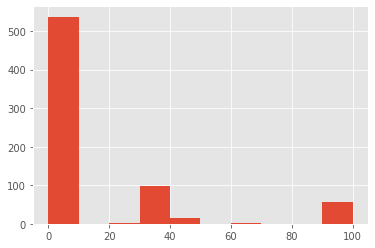

In [125]:
pd.to_numeric(sentencing_orig.query("COMMITMENT_UNIT=='Natural Life'")["COMMITMENT_TERM"]).hist()

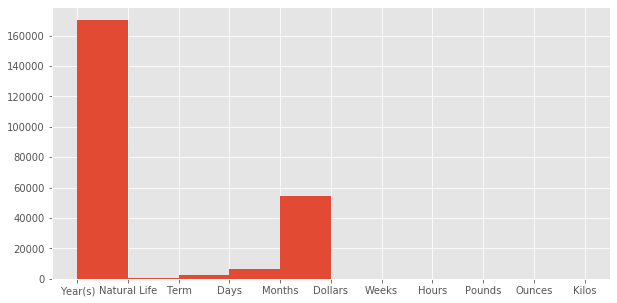

In [60]:
# Sentencing types; Seems to mostly be time
sentencing_orig["COMMITMENT_UNIT"].hist(figsize=(10,5))

In [77]:
# This is not the best way to do this - only an estimate
sentencing_orig.groupby(["COMMITMENT_UNIT"]).count().iloc[:,0]

COMMITMENT_UNIT
Days              6466
Dollars             70
Hours               19
Kilos                1
Months           54520
Natural Life       712
Ounces               1
Pounds               2
Term              2326
Weeks               16
Year(s)         170383
Name: CASE_ID, dtype: int64

# Load Dataset

In [1220]:
sentencing_orig = pd.read_csv("Sentencing.csv",
                              parse_dates=["DISPOSITION_DATE", "SENTENCE_DATE", "INCIDENT_BEGIN_DATE", "INCIDENT_END_DATE", "ARREST_DATE", "ARRAIGNMENT_DATE", "RECEIVED_DATE"])

C:\Users\minur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [909]:
sentencing_orig.shape

(236124, 39)

# Drop unused features once processing categorical sentences is complete
- Features to be dropped:
    - Features involving time
        - DISPOSITION_DATE, SENTENCE_DATE, INCIDENT_BEGIN_DATE, INCIDENT_END_DATE, ARREST_DATE, RECEIVED_DATE, ARRAIGNMENT_DATE
    - Unique identifiers:
        - CASE_ID, CASE_PARTICIPANT_ID, CHARGE_ID, CHARGE_VERSION_ID, DISPOSITION_CHARGED_CHAPTER
    - Features which seem to be useless (mostly ones that dont encode much information / has same value for all examples
        - OFFENSE_CATEGORY
        - 
    - Drop DISPOSITION_CHARGED_OFFENSE_TITLE and related features for two reasons
        - Has far too many unique values
             - UPDATED_OFFENSE_CATEGORY appears to be the final decision and where UPDATED_OFFENSE_CATEGORY differs significantly from DISPOSITION_CHARGED_OFFENSE_TITLE (such as change from First degree murder -> burglary), the sentence seems to match UPDATED_OFFENSE_CATEGORY.
        - Other related features include:
             - DISPOSITION_CHARGED_CHAPTER, DISPOSITION_CHARGED_ACT, DISPOSITION_CHARGED_SECTION, DISPOSITION_CHARGED_CLASS, DISPOSITION_CHARGED_AOIC, DISPOSITION_DATE, CHARGE_DISPOSITION_REASON
    - Other features that are not related to the crime(I want a model that tries to not be biased towards factors that shouldn't make a diffference in the sentence). ALSO TRY WITH THESE FEATURES AND SEE HOW CHANGING IT CHANGES THE PREDICTION.
        - SENTENCE_JUDGE, LENGTH_OF_CASE_in_Days, COMMITMENT_TYPE (to be dropped after findLifeSentences), COURT_NAME, COURT_FACILITY, LAW_ENFORCEMENT_AGENCY, UNIT (similar to agency, more specific)

# Processing Categorical Sentences

### Finding Life Sentences
Life Sentence can appear in one of two columns (with the other column being NA).
Below, I figure out which columns (COMMITMENT_TYPE/COMMITMENT_UNIT) contain this information and pull this out into a new column called 'categorical_sentence'.

In [910]:
#Trying to figure out which columns include 'Life Sentence'

life_anywhere = sentencing_orig.eq('Natural Life').any(axis=1)
life_SENTENCE_PHASE = sentencing_orig["SENTENCE_PHASE"].str.contains("life|Life|LIFE", na=False)       # Total 0
life_COMMITMENT_UNIT = sentencing_orig["COMMITMENT_UNIT"].str.contains("life|Life|LIFE", na=False)     # Total 712
life_COMMITMENT_TERM = sentencing_orig["COMMITMENT_TERM"].str.contains("life|Life|LIFE", na=False)     # Total 0
life_COMMITMENT_TYPE = sentencing_orig["COMMITMENT_TYPE"].str.contains("life|Life|LIFE", na=False)     # Total 20
# life_CURRENT_SENTENCE = sentencing_orig["CURRENT_SENTENCE"].str.contains("life|Life", na=False) # has problems but unlikely to contain life sentence so ignore.
life_SENTENCE_TYPE = sentencing_orig["SENTENCE_TYPE"].str.contains("life|Life|LIFE", na=False)         # Total 0
life_COMMITMENT_UNIT_and_SENTENCE_TYPE = life_COMMITMENT_UNIT & life_COMMITMENT_TYPE                   # Total 1
life_COMMITMENT_UNIT_or_SENTENCE_TYPE = life_COMMITMENT_UNIT | life_COMMITMENT_TYPE                    # Total 731

print(f"Number of rows with the words Natural Life {life_anywhere.sum()}")
print(f"Number of rows with the word life in SENTENCE_PHASE {life_SENTENCE_PHASE.sum()}")
print(f"Number of rows with the word life in COMMITMENT_UNIT {life_COMMITMENT_UNIT.sum()}")
print(f"Number of rows with the word life in COMMITMENT_TERM {life_COMMITMENT_TERM.sum()}")
print(f"Number of rows with the word life in COMMITMENT_TYPE {life_COMMITMENT_TYPE.sum()}")
print(f"Number of rows with the word life in SENTENCE_TYPE {life_SENTENCE_TYPE.sum()}")
print(f"Number of rows with the word life in COMMITMENT_UNIT_and_SENTENCE_TYPE {life_COMMITMENT_UNIT_and_SENTENCE_TYPE.sum()}")
print(f"Number of rows with the word life in COMMITMENT_UNIT_or_SENTENCE_TYPE {life_COMMITMENT_UNIT_or_SENTENCE_TYPE.sum()}")

# Conclusion: Life sentences appear either in COMMITMENT_UNIT or in COMMITMENT_TYPE columns

C:\Users\minur\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Number of rows with the words Natural Life 731
Number of rows with the word life in SENTENCE_PHASE 0
Number of rows with the word life in COMMITMENT_UNIT 712
Number of rows with the word life in COMMITMENT_TERM 0
Number of rows with the word life in COMMITMENT_TYPE 20
Number of rows with the word life in SENTENCE_TYPE 0
Number of rows with the word life in COMMITMENT_UNIT_and_SENTENCE_TYPE 1
Number of rows with the word life in COMMITMENT_UNIT_or_SENTENCE_TYPE 731


In [911]:
def processLifeSentences(df):
    """
    Input: Cook county dataset
    Output: Cook county dataset with an additional column called 'categorical_sentence' which is "Life" for a life sentence and "other" for everything else.
    """
    life_COMMITMENT_UNIT = df["COMMITMENT_UNIT"].str.contains("life|Life|LIFE", na=False)
    life_COMMITMENT_TYPE = df["COMMITMENT_TYPE"].str.contains("life|Life|LIFE", na=False)
    life_or_not = life_COMMITMENT_UNIT | life_COMMITMENT_TYPE
    life_or_not = life_or_not.replace(True, "Life")
    life_or_not = life_or_not.replace(False, "Other")
    df.loc[:,"categorical_sentence"] = life_or_not
    
    return df    

In [912]:
select_columns = ["DISPOSITION_CHARGED_OFFENSE_TITLE", "UPDATED_OFFENSE_CATEGORY", "COMMITMENT_TYPE", "COMMITMENT_TERM", "COMMITMENT_UNIT",  "categorical_sentence"]

In [914]:
processed_life_sentences = processLifeSentences(sentencing_orig)

In [915]:
# Verify that 731 rows have Life sentence in the 'categorical_sentence' column
(processed_life_sentences["categorical_sentence"]=="Life").sum()

731

In [916]:
# Verify that no rows have been dropped
len(sentencing_orig) - len(processed_life_sentences)

0

In [917]:
# Preview a sample of the dataframe. Only selected columns displayed. Note the new column 'categorical_sentence'
processed_life_sentences.head(15)[select_columns]

,DISPOSITION_CHARGED_OFFENSE_TITLE,UPDATED_OFFENSE_CATEGORY,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,categorical_sentence
0,FIRST DEGREE MURDER,Homicide,Natural Life,NaN,NaN,Life
1,FIRST DEGREE MURDER,Homicide,Natural Life,NaN,NaN,Life
2,FIRST DEGREE MURDER,Homicide,Natural Life,NaN,NaN,Life
3,HOME INVASION,Homicide,Illinois Department of Corrections,30,Year(s),Other
4,HOME INVASION,Homicide,Illinois Department of Corrections,30,Year(s),Other
5,HOME INVASION,Homicide,Illinois Department of Corrections,30,Year(s),Other
6,ARMED ROBBERY,Homicide,Illinois Department of Corrections,30,Year(s),Other
7,ARMED ROBBERY,Homicide,Illinois Department of Corrections,30,Year(s),Other
8,ARMED ROBBERY,Homicide,Illinois Department of Corrections,30,Year(s),Other
9,FIRST DEGREE MURDER,Homicide,Illinois Department of Corrections,62,Year(s),Other


### Drop any examples where the sentence is death.
- Doing this primarily because this dataset clearly has errors with death sentences.
    - Run this query: sentencing_orig.query("SENTENCE_TYPE == 'Death'").groupby("DISPOSITION_CHARGED_OFFENSE_TITLE")["CASE_ID"].nunique()
    - Out of the 64 examples, only 5 involve homicide. The others are clearly incorrect examples are for Credit Card Cases' and  and 'Retail Fraud'
    - Exception is where the row also has a "Natural Life" in the COMMITMENT_UNIT column. These rows are kept but classified as Life sentence - not death. 

In [918]:
print(processed_life_sentences["SENTENCE_TYPE"].str.contains("Death|death|DEATH", na=False).sum())
print(processed_life_sentences["COMMITMENT_TYPE"].str.contains("Death|death|DEATH", na=False).sum())

63
9


In [919]:
def dropDeathSentence(df):
    """
    Input: Cook County Dataset after it has been processed by processLifeSentences and the 'categorical_sentence' column is added. 
    Output: Input dataset minus any rows involving death sentence because most of these are clearly errors (see notes).
    """

    #death_in_SENTENCE_TYPE = df.query("SENTENCE_TYPE == 'Death'")      # 63 examples
    death_in_SENTENCE_TYPE = df["SENTENCE_TYPE"].str.contains("Death|death|DEATH", na=False)
    
    #death_in_COMMITMENT_TYPE = df.query("COMMITMENT_TYPE == 'Death'")  # 9 examples
    death_in_COMMITMENT_TYPE = df["COMMITMENT_TYPE"].str.contains("Death|death|DEATH", na=False)

    incorrect_death_sentences = death_in_SENTENCE_TYPE | death_in_COMMITMENT_TYPE
    
    # Life sentences which should not be dropped even if it appears as a death sentence. See notes.
    life_sentences_mask = df["categorical_sentence"] == "Life"

    return df[~incorrect_death_sentences|life_sentences_mask]

In [920]:
no_death_sentences = dropDeathSentence(processed_life_sentences)

In [922]:
# Number of rows removed
len(sentencing_orig) - len(no_death_sentences)

56

In [927]:
# Verify no rows with death sentences remain except where it is also a Life sentence
print(((no_death_sentences["SENTENCE_TYPE"].str.contains("Death|death|DEATH", na=False)) & (no_death_sentences["categorical_sentence"]!="Life")).sum())
print(((no_death_sentences["COMMITMENT_TYPE"].str.contains("Death|death|DEATH", na=False)) & (no_death_sentences["categorical_sentence"]!="Life")).sum())

0
0


### Figuring out other categorical sentence type

Examples with the following COMMITMENT_TYPE should be dropped because it is either:
   - Derived from information that is not available in this table
        - Mental Health Probation
        - Any NaN excluding for life sentence
        - Gang Probation
        - 2nd Chance Probation
        - Veteran's Court Probation
        - Inpatient Mental Health Services
        - Repeat Offender Probation
   - Too few examples (<50)
        - Conditional Release
        - Domestic Violence Probation
        - Repeat Offender Probation
        - Periodic Imprisonment 
        - Home Confinement
        - Probation Terminated Unsatisfactorily
        - Probation Terminated Instanter
   - NaN (except for life sentence)

Keep only these COMMITMENT_TYPE (rename ones that are grouped to the group name):
   - "Prison"
        - Illinois Department of Corrections
        - Cook County Department of Corrections
   - "Boot Camp"
        - Cook County Boot Camp
        - Cook County Impact Incarceration Program
   - "Probation"
        - Probation
        - 710/410 Probation (Probation for drug offenders with no prior criminal record)
   - "Intensive Probation Services"
   - "Conditional Discharge"
   - "Court Supervision"
   - "Intensive Drug Probation Services"
   - "Drug Court Probation"
   - "Gang Probation"
   - "Sex Offender Probation"
   - "Drug School"
   - "Juvenile IDOC"


In [928]:
def processCOMMITMENT_TYPE(df):
    """
    Input: Cook County dataset which includes "categorical_sentence" column added by processLifeSentences.
    Output: Keeps only rows with select COMMITMENT_TYPE (see notes for reasons)  and drop rest.
            Fill the column categorical_sentence with the same value as in COMMITMENT_TYPE (except for a few which are grouped together; see notes) 
    """
    
    commitment_types_to_keep = ["Illinois Department of Corrections",
                                "Cook County Department of Corrections",
                                "Cook County Boot Camp",
                                "Cook County Impact Incarceration Program",
                                "Probation",
                                "710/410 Probation",
                                "Intensive Probation Services",
                                "Conditional Discharge",
                                "Court Supervision",
                                "Intensive Drug Probation Services",
                                "Drug Court Probation",
                                "Gang Probation",
                                "Sex Offender Probation",
                                "Drug School",
                                "Juvenile IDOC"]
    commitment_types_mask = df["COMMITMENT_TYPE"].isin(commitment_types_to_keep)
    life_sentences_mask = df["categorical_sentence"] == "Life"  # Boolean array
    
    # Filter only select COMMITMENT_TYPE or life sentences
    df = df.loc[commitment_types_mask | life_sentences_mask]
    
    life_sentences_mask = df["categorical_sentence"] == "Life"  # Update life sentences mask after removing select categories

    # COMMITMENT_TYPE is inconsistent for life sentence; sometimes shows COMMITMENT_TYPE as 'Prison' for life sentences.
    # For my purposes, a life sentence is different from a regular prison sentence. 
    # Whereever COMMITMENT_TYPE was 'Prison' for life sentences, overwrite that value as 'Life' before copying over to 'categorical_sentence' column.
    
#     updated_categorical_sentence = pd.Series(df["COMMITMENT_TYPE"])  # do pd.DataFrame to avoid settingwithcopywarning which should not be given since I want to modify the copy.
#     *********** UPDATED BELOW ***********
    updated_categorical_sentence = df["COMMITMENT_TYPE"].copy()  # force a copy which will be modified and pasted over categorical_sentence
    updated_categorical_sentence.loc[life_sentences_mask] = "Life"  # Overwrite any 
    df.loc[:,"categorical_sentence"] = updated_categorical_sentence  # update categorical_sentence with new categories
    
    # Some categories have multiple names. Rename to a common one.
    df = df.replace({'categorical_sentence':
                     {"Illinois Department of Corrections": "Prison",
                      "Cook County Department of Corrections": "Prison",
                      "Cook County Boot Camp": "Boot Camp",
                      "Cook County Impact Incarceration Program": "Boot Camp",
                      "710/410 Probation": "Probation"}})

    return df

In [929]:
processed_commitment_type = processCOMMITMENT_TYPE(no_death_sentences)

C:\Users\minur\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [940]:
# Preview after adding other categories to 'categorical_sentence'
processed_commitment_type.head(15)[select_columns]

,DISPOSITION_CHARGED_OFFENSE_TITLE,UPDATED_OFFENSE_CATEGORY,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,categorical_sentence
0,FIRST DEGREE MURDER,Homicide,Natural Life,NaN,NaN,Life
1,FIRST DEGREE MURDER,Homicide,Natural Life,NaN,NaN,Life
2,FIRST DEGREE MURDER,Homicide,Natural Life,NaN,NaN,Life
3,HOME INVASION,Homicide,Illinois Department of Corrections,30,Year(s),Prison
4,HOME INVASION,Homicide,Illinois Department of Corrections,30,Year(s),Prison
5,HOME INVASION,Homicide,Illinois Department of Corrections,30,Year(s),Prison
6,ARMED ROBBERY,Homicide,Illinois Department of Corrections,30,Year(s),Prison
7,ARMED ROBBERY,Homicide,Illinois Department of Corrections,30,Year(s),Prison
8,ARMED ROBBERY,Homicide,Illinois Department of Corrections,30,Year(s),Prison
9,FIRST DEGREE MURDER,Homicide,Illinois Department of Corrections,62,Year(s),Prison


In [932]:
# Note that any rows which have a COMMITMENT_TYPE not in the selected list are dropped
len(no_death_sentences) - len(processed_commitment_type)

4729

# Calculating sentence period in years

Note: Inspected and verified that the only categories in 'categorical_sentence' which do not have COMMITMENT_TERM or COMMITMENT_UNIT are "Life" and "Boot Camp" which should not have a time duration.
There are some instances of Life and Boot Camp having a time duration, but these are ignored because they do not make sense here.

Cleaning rules:
- For 'Life' and 'Boot Camp', the COMMITMENT_TERM and COMMITMENT_UNIT columns are ignored if they are not NaN. The sentence_period_years column will always be NaN for these examples.

- The below rules apply only all categories except 'Life' and 'Boot Camp'
    - If the COMMITMENT_TERM fails coercion to number by pandas, remove row. There appear to be a few examples where there are errors in entry (such as including the month in COMMITMENT_TERM). These are very few cases, so dropping them is the simplest thing to do.
    - If the COMMITMENT_UNIT is not one of \['Year(s)', 'Months', 'Weeks', 'Days'\], drop row.
    - If the sentence_period_years is greater than 300 years, discard row. (Doing this because I found two examples where the sentence was 2.0e6 for non-homicide.) 

In [941]:
# Split dataset into two parts: one with only 'Life'/'Boot Camp' and the other with the remaining categorical_sentence
no_duration_set = processed_commitment_type.query("categorical_sentence == 'Life' | categorical_sentence =='Boot Camp'")
duration_set = processed_commitment_type.query("categorical_sentence != 'Life' & categorical_sentence !='Boot Camp'")

In [942]:
# Verify that together the two sets added together are not missing any rows 
len(duration_set)+len(no_duration_set)-len(processed_commitment_type)

0

In [943]:
# Confirm that there are no examples with missing COMMITMENT_TERM or COMMITMENT_UNIT
categories = duration_set["categorical_sentence"].unique()
for category in categories:
    rows_for_category = duration_set.query("categorical_sentence == @category")
    rows_missing_duration = rows_for_category[duration_set['COMMITMENT_TERM'].isna() | duration_set['COMMITMENT_UNIT'].isna()]
    
    print(f"""{category}: {len(rows_missing_duration)}""")

C:\Users\minur\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Prison: 0
Probation: 0
Court Supervision: 0
Conditional Discharge: 0
Intensive Probation Services: 0
Drug Court Probation: 0
Intensive Drug Probation Services: 0
Gang Probation: 0
Sex Offender Probation: 0
Drug School: 0
Juvenile IDOC: 0


In [949]:
# filter only COMMITMENT_UNIT with ['Year(s)', 'Months', 'Weeks', 'Days']
proper_units_mask = duration_set['COMMITMENT_UNIT'].isin(['Year(s)', 'Months', 'Weeks', 'Days'])
duration_set_filtered_unit = duration_set[proper_units_mask]
print(len(duration_set) - len(duration_set_filtered_unit))

270


In [951]:
# filter only rows with numeric COMMITMENT_TERM
num_temp = pd.to_numeric(duration_set_filtered_unit["COMMITMENT_TERM"], errors="coerce")
duration_set_filtered_unit_term = pd.DataFrame(duration_set_filtered_unit)
duration_set_filtered_unit_term.loc[:,"COMMITMENT_TERM"] = num_temp
duration_set_filtered_unit_term = duration_set_filtered_unit_term.dropna(subset=["COMMITMENT_TERM"])
print(len(duration_set_filtered_unit) - len(duration_set_filtered_unit_term))

4


In [952]:
# Verify COMMITMENT_UNIT includes only those that were filtered
duration_set_filtered_unit_term["COMMITMENT_UNIT"].unique()

array(['Year(s)', 'Days', 'Months', 'Weeks'], dtype=object)

In [953]:
(no_duration_set['categorical_sentence']=="Life").sum()

731

In [956]:
# Convert all units to years

all_years = duration_set_filtered_unit_term.copy()

def convert_to_years(df, unit, multiplier):
    """
    input: Cook County dataset which includes "categorical_sentence" column added by processLifeSentences.
    output: Adds a column called 'sentence_period_years' to dataframe.
            For COMMITMENT_UNIT which matches 'unit', fill in sentence_period_years with the value in COMMITMENT_TERM * multiplier
            Leaves all other rows untouched.
    """

    if ("sentence_period_years" not in df.columns):
        all_years["sentence_period_years"] = np.NaN  # add column which will be updated with sentence period in years
        
    multiplied_units = df["COMMITMENT_TERM"].copy() * multiplier  # do for all rows including ones not matching 'unit'
    unit_mask = df["COMMITMENT_UNIT"] == unit

#     print(unit_mask.head())
    df.loc[unit_mask, "sentence_period_years"] = multiplied_units.loc[unit_mask]
    return df
    

In [957]:
if "sentence_period_years" not in select_columns:
    select_columns.append("sentence_period_years")

In [958]:
all_years["COMMITMENT_UNIT"].unique()

array(['Year(s)', 'Days', 'Months', 'Weeks'], dtype=object)

In [961]:
all_years = convert_to_years(all_years, "Year(s)", 1)
all_years = convert_to_years(all_years, "Months", 1/12)
all_years = convert_to_years(all_years, "Weeks", 1/52)
all_years = convert_to_years(all_years, "Days", 1/365.25)

In [962]:
# Verify that no rows are dropped
len(duration_set_filtered_unit_term) - len(all_years)

0

In [969]:
# Preview after all processing is done
all_years.tail(10)[select_columns]

,DISPOSITION_CHARGED_OFFENSE_TITLE,UPDATED_OFFENSE_CATEGORY,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,categorical_sentence,sentence_period_years
236111,CRIMINAL TRESPASS TO VEHICLES,Possession of Stolen Motor Vehicle,Cook County Department of Corrections,2.0,Days,Prison,0.005476
236112,AGGRAVATED UNLAWFUL USE OF WEAPON,UUW - Unlawful Use of Weapon,Probation,2.0,Year(s),Probation,2.000000
236113,AGGRAVATED BATTERY,Aggravated Battery Police Officer,Probation,2.0,Year(s),Probation,2.000000
236114,AGG UUW/LOADED/NO FCCA/FOID,UUW - Unlawful Use of Weapon,Cook County Department of Corrections,1.0,Year(s),Prison,1.000000
236115,ATTEMPT POSSESSION OF A CONTROLLED SUBSTANCE,Narcotics,Cook County Department of Corrections,39.0,Days,Prison,0.106776
236117,ESCAPE; FAILURE TO COMPLY WITH A CONDITION OF THE ELECTRONIC HOME MONITORING DETENTION PROGRAM,Escape - Failure to Return,Illinois Department of Corrections,2.0,Year(s),Prison,2.000000
236119,PUBLIC INDECENCY/EXPOSURE/3+,Other Offense,Illinois Department of Corrections,2.0,Year(s),Prison,2.000000
236120,MFG/DEL CANNABIS/2.5-10 GRAMS,Narcotics,Illinois Department of Corrections,2.0,Days,Prison,0.005476
236122,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,Aggravated DUI,Illinois Department of Corrections,1.0,Year(s),Prison,1.000000
236123,VIOLATION OF THE SEX OFFENDER REGISTRATION ACT,Failure to Register as a Sex Offender,Illinois Department of Corrections,3.0,Year(s),Prison,3.000000


In [1002]:
len(all_years)

227721

In [1006]:
all_years.iloc[227720:227721]

,CASE_ID,CASE_PARTICIPANT_ID,OFFENSE_CATEGORY,PRIMARY_CHARGE,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,DISPOSITION_DATE,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_JUDGE,SENTENCE_TYPE,CURRENT_SENTENCE,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,COURT_NAME,COURT_FACILITY,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,GENDER,RACE,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,ARREST_DATE,LAW_ENFORCEMENT_AGENCY,UNIT,INCIDENT_CITY,RECEIVED_DATE,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,CHARGE_COUNT,categorical_sentence,sentence_period_years
236123,131109649851,1099816034107,Failure to Register as a Sex Offender,True,2582092325603,588878719878,VIOLATION OF THE SEX OFFENDER REGISTRATION ACT,730,150,3(b),2,0013774,11/5/2019 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,11/5/2019 12:00:00 AM,Vincent M Gaughan,Prison,True,Illinois Department of Corrections,3.0,Year(s),District 1 - Chicago,26TH Street,0.0,48.0,Male,White,2019-07-27,NaT,2019-07-27 11:46:00,CHICAGO PD,NaN,Chicago,2019-07-27,11/5/2019 12:00:00 AM,Failure to Register as a Sex Offender,1,Prison,3.0


In [1224]:
# Random check for errors in data processing (Take random rows from the processed dataset and compare the original columns to the original dataset)
# Important: Make sure I reload the values into sentencing_orig by reading from diisk before running to be certain that sentencing_orig was not changed.
for i in range(1000):
    random_row_number_in_processed_data = np.random.randint(1,len(all_years) + 1) # max = len(all_years) = [1,227721]
    index_number_of_row = all_years.iloc[random_row_number_in_processed_data-1:random_row_number_in_processed_data].index[0]
    original_row = sentencing_orig.loc[index_number_of_row] # note we are indexing by ID now
    processed_row = all_years.loc[index_number_of_row]

    # drop categorical sentence since it is only in processed_row.
    compare_df = pd.DataFrame(original_row).T.append(pd.DataFrame(processed_row).T).dropna(axis=1) #.drop(['categorical_sentence'], axis=1)  <- need this if sentencing_orig has been modified to include categorical_sentence
    compare_df.loc[:,"COMMITMENT_TERM"] = pd.to_numeric(compare_df.loc[:,"COMMITMENT_TERM"])
    try:
        assert np.all(compare_df.iloc[0]==compare_df.iloc[1]), "error - compare not equal"
    except:
        print(compare_df.iloc[0]==compare_df.iloc[1])
        print(f"i = {i}")
        assert False, "Just to break the loop so that I can see which values are different"

print("Success! All tested rows are equal to the original.")

Success! All tested rows are equal to the original.


In [1225]:
# Save processed data to disk
all_years.to_csv("processed_sentencing_data.csv")

# List of possible errors
1. CASE_ID 113570699133 - sentenced to death for posession of cannabis

### Commitment term / unit processing
1. Only keep rows with commitment unit of [Days, Months, Natural Life]
1. Sentence can be:
    - a time in days, months or years
        - Time period can be taken from (COMMITMENT_TERM, COMMITMENT_UNIT) columns.
    - or one of three categorical outcomes:
        - Death (Ignore)
        - Life Sentence
        - Cook County Boot Camp

1. Reason why 'Death' is ignored:
    - sentencing_orig[sentencing_orig.eq('Death').any(axis=1)]
    - 'Death' appears only 9 times under COMMITMENT_TYPE and 63 times under SENTENCE_TYPE.
    - Decided to ignore Death penalty because all of It appears to be clearly incorrect.
    - The two different ways of looking for Death sentences with some overlap in the examples gotten from each method (see below).
    - When Death appears under SENTENCE_TYPE:
        - sentencing_orig.query("SENTENCE_TYPE=='Death'")
        - This is likely incorrect because many of the charges are fairly minor (possesion of cannabis, DUI, robbery, etc.) and do not include murder which is mandatory according to https://deathpenaltyinfo.org/facts-and-research/crimes-punishable-by-death . I checked that the CASE_PARTICIPANT_ID does not also include other crimes (CASE_COUNT mostly 1) which could have explained the death penalty through the other charges (although this shouldn't really be a valid reason as each crime gets an individual sentence).
        - 61/63 examples include (COMMITMENT_TERM, COMMITMENT_UNIT) information that is a time period (Of the ones without a time period, 1 has (NaN, NaN) and one has (1, Term) instead)
    
    - When Death appears under SENTENCE_TYPE: 
        - sentencing_orig.query("COMMITMENT_TYPE=='Death'")
        - Under COMMITMENT_TYPE, it appears to have (COMMITMENT_TERM,COMMITMENT_UNIT) of (1, Natural Life) for 7 examples and 1 each of (NaN, NaN) and (0, Term).
        - Again, only 5/9 examples include murder. This site shows that it is impossible to be sentenced to death for a non-murder in Illinois https://deathpenaltyinfo.org/facts-and-research/crimes-punishable-by-death/death-penalty-for-offenses-other-than-murder

    - Since almost all of these examples (both types) include a time period and since the death penalty looks unlikely in many of these cases, I will ignore the death penalty and just take the time period in (COMMITMENT_TERM, COMMITMENT_UNIT)
   
1. How to decide whether sentence is 'Natural Life':
    - "Life sentence' expressed in several different ways in this dataset:
        - COMMITMENT_UNIT=='Natural Life' = 712
        - COMMITMENT_TYPE=='Natural Life' and COMMITMENT_UNIT=='NaN'; count = 20
    - it seems you can have COMMITMENT_TYPE='Natural Life' or you can have COMMITMENT_UNIT='Natural Life'

1. Assumption: For crimes that involve multiple charges, we assume that each conviction is sentenced independantly of the others and is neither influenced by the other nor is the maximum sentence for a single charge applied to each of the individual charges. The opposite of this can be easily proven by inspection (i.e. pick a CASE_ID that has multiple charges and you can find different sentences for each of the charges. Whether or not this holds for all CASE_IDs is not known but is likely from what I have read about how sentencing works.

1. Drop all convictions that involve cannabis because the sentencing has likely changed over the years.

1. Something to look at would be to see if the number of convictions for a single crime affects the sentence. To do this, replace the CHARGE_COUNT for a single CASE_ID, with the highest count OR manually count the number of charges for a single CASE_ID for each CASE_ID. Another thing to try would be to only take the charge which has PRIMARY_CHARGE=True and drop all of the other rows for the CASE_ID. 

- Categorical outcomes: Life sentence, Cook County Boot Camp

# Todo

Column descriptions: https://datacatalog.cookcountyil.gov/Courts/Sentencing/tg8v-tm6u

### Exploratory Data Analsis
- Look at the data manually and try to find rare charges for which we have too little information to make predictions and remove these examples OR use only the top 10 charges and ignore the rest.
- PLot a covariance matrix of sentence length vs each of the other variables. It will be interesting to see how things like case duration and age at time of sentence corellate to sentence length.
- Plot Sankey diagrams of the following:
    - Left: what people were arrested, Right: what they are charged for.
    - Left: charge disposition title, right: sentence duration discretized to 5 year blocks (make sure the order on the right is correct).
    - Left: percentage of race by population of cook county/ Chicago, Right: percentage of race as represented in this dataset

### Machine Learning:
- Look at the proper way to determine a life sentence (i.e. which columns, etc) -> Use life_COMMITMENT_UNIT==True OR life_COMMITMENT_TYPE==True
- Look at the proper way to determine a cook county boot camp (i.e. which columns, etc)
- Figure out a conversion for the time for prison sentences (must convert days, months, years to a unique value)
- How to deal with all of the possible charges (DISPOSITION_CHARGED_OFFENSE_TITLE) has ~1600 possible charges. See [this](https://stats.stackexchange.com/questions/146907/principled-way-of-collapsing-categorical-variables-with-many-levels).
- Should I use classification or regression here? Even though a sentence is in a continuous unit (time), only a very few values seem to be used. For instance, in the worst case senario, there are only ~2000 unique sentences in this dataset of ~200,000 which is around 1% of unique cases. This data, however is ordinal and if we use a naive classification method, we will be losing information. A solution to this would be to use the method described [here](https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c). If using classification, we could also simplify the problem and decrease weeor by binning any sentences that appear very close together (e.g. use 1 dimensional k-means on the log transform of the prediction (otherwise, you will end up with smaller cluster for the longer duration sentences because even if they change by 1 year, this will be much more than a sentences in the range of say 1 week and 90 days which appear to be more different to each other than the 1 year change for a 30 year sentence.
    - Using classification also solves the problem of dealing with life sentences and boot camp with the continuous time duration sentences.
    - Also try regression, again with log transformed predictions (because again, we care more about the relative differences in time periods). I think random forest regression would work much better than ridge/lasso because the targets are not continuously distributed.
- For life sentence / boot camp:
    - try a fixed duration like 50 years for life sentence (look at whether Chicago has a limit on life sentence, if yes, use that limit)
    - \[Use average life expectancy of a person in the US\] - \[age at arrest\]
    - for boot camp try 0 years

- See which offense type has the lowest R^2 value - this might be an indicator of crimes which may be the most inconsistently judged
- Run several versions of the algorithm
    - One with everything except sentence length
    - One whose objective is to predict sentence given the true crime (which is established by the judge) but no other features that depend on the case itself (case duration, charge_disposition_title, charge_disposition, any other features that incluse \*disposition\*, SENTENCE_JUDGE, etc.)
    - One with only the information available at time of arrest (remove everything feature after arrest, including the features that were kept above)

- Try using [XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

In [224]:
len(sentencing_orig)

236124

### Law facts
- A crime may bring multiple charges and sentences, but usually only the longest sentence is served because of the 'No Double punishment rule'


### Things about the legal system that are hard to believe
- "For example, in one California case, a defendant kidnapped a woman, drove her into the desert, and raped her. He was convicted of kidnapping and rape, but because the court found that these crimes were part of a single, continuous criminal plan, he could be punished for only one conviction (kidnapping, which carried the longer sentence). But from a victim’s point of view, surely being kidnapped and then raped is more damaging than a kidnapping without a rape; yet the defendant who does both will be punished as if the rape had not occurred." [https://www.lawyers.com/legal-info/criminal/criminal-law-basics/how-do-multiple-convictions-affect-my-sentence.html]
- This also seems to work sometimes for separately commited offenses so it makes sense to try to get as many offenses into a single trial [https://www.law.ox.ac.uk/centres-institutes/centre-criminology/blog/2016/01/more-one-crime-sentencing-multiple-offences] 
